# Deep Learning Tutorial 04: CNN - Sentiment Analysis from Movie Reviews (Ch22)

from Deep Learning with Python by Jason Brownlee (2016)
[e-book](https://machinelearningmastery.com/deep-learning-with-python/)
[요약](http://machinelearningmastery.com/introduction-python-deep-learning-library-keras/)

# Chapter 22 Project: Predict Sentiment From Movie Reviews

## 22.1 Movie Review Sentiment Classification Dataset

[IMDB 데이터셋 홈페이지](http://www.cs.toronto.edu/~kriz/cifar.html), [데이터 파일](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz)
- Movie Reviews (Positive or Negative)
- training: 25,000
- test: 25,000

## 22.2 Load the IMDB Dataset With Keras

In [1]:
%matplotlib inline

import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(test_split=0)

!ls -al ~/.keras/datasets

/home/kikim/anaconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)


33202176/33213513 [============================>.] - ETA: 0stotal 213900
drwxrwxr-x 3 kikim kikim      4096  7월 31 17:22 .
drwxrwxr-x 3 kikim kikim      4096  7월  8 02:08 ..
drwxr-xr-x 2 kikim kikim      4096  6월  5  2009 cifar-10-batches-py
-rw-rw-r-- 1 kikim kikim 170498071  7월 23 14:34 cifar-10-batches-py.tar.gz
-rw-rw-r-- 1 kikim kikim  33213513  7월 31 17:39 imdb.pkl
-rw-rw-r-- 1 kikim kikim  15296311  7월  8 02:09 mnist.pkl.gz


In [2]:
# summarize size
print("Training data: ")
print(X_train.shape)
print(y_train.shape)

print("X_train[0]:")
print(X_train[0])

print("y_train[0]:")
print(y_train[0])

# Summarize number of classes
print("Classes: %s" % numpy.unique(y_train))


Training data: 
(25000,)
(25000,)
X_train[0]:
[1, 20, 28, 716, 48, 495, 79, 27, 493, 8, 5067, 7, 50, 5, 4682, 13075, 10, 5, 852, 157, 11, 5, 1716, 3351, 10, 5, 500, 7308, 6, 33, 256, 41, 13610, 7, 17, 23, 48, 1537, 3504, 26, 269, 929, 18, 68709, 7, 22565, 4284, 8, 105, 5, 22396, 182, 314, 38, 98, 103, 7, 36, 2184, 246, 360, 7, 19, 396, 17, 26, 269, 929, 18, 1769, 493, 6, 116, 7, 105, 5, 575, 182, 27, 5, 1002, 1085, 130, 62, 17, 24, 89, 17, 13, 381, 1421, 8, 5167, 7, 5, 2723, 38, 325, 7, 17, 23, 93, 9, 156, 252, 19, 235, 20, 28, 5, 104, 76, 7, 17, 169, 35, 14764, 17, 23, 1460, 7, 36, 2184, 934, 56, 2134, 6, 17, 891, 214, 11, 5, 1552, 6, 92, 6, 33, 256, 82, 7]
y_train[0]:
1
Classes: [0 1]


Number of words: 102099
Review length: Mean 285.84 words (212.622320)


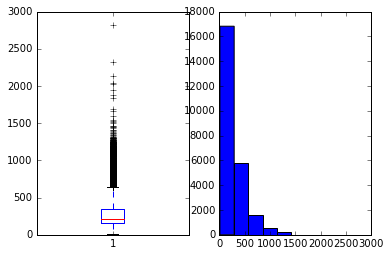

In [3]:
# Summarize number of words
print("Number of words: %d" % len(numpy.unique(numpy.hstack(X_train))))

# Summarize review length
result = map(len, X_train)
print("Review length: Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

## 22.3 Word Embeddings

[Word2Vec](http://deeplearning4j.org/kr-word2vec)  
[Keras embedding](https://keras.io/layers/embeddings/)


## 22.4 Simple Multilayer Perceptron Model

In [7]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(
    nb_words=top_words, test_split=test_split)


In [15]:
print("X_train.shape", X_train.shape)
print("X_train.shape", X_train[0])

('X_train.shape', (16750,))
('X_train.shape', [1, 20, 28, 716, 48, 495, 79, 27, 493, 8, 2, 7, 50, 5, 4682, 2, 10, 5, 852, 157, 11, 5, 1716, 3351, 10, 5, 500, 2, 6, 33, 256, 41, 2, 7, 17, 23, 48, 1537, 3504, 26, 269, 929, 18, 2, 7, 2, 4284, 8, 105, 5, 2, 182, 314, 38, 98, 103, 7, 36, 2184, 246, 360, 7, 19, 396, 17, 26, 269, 929, 18, 1769, 493, 6, 116, 7, 105, 5, 575, 182, 27, 5, 1002, 1085, 130, 62, 17, 24, 89, 17, 13, 381, 1421, 8, 2, 7, 5, 2723, 38, 325, 7, 17, 23, 93, 9, 156, 252, 19, 235, 20, 28, 5, 104, 76, 7, 17, 169, 35, 2, 17, 23, 1460, 7, 36, 2184, 934, 56, 2134, 6, 17, 891, 214, 11, 5, 1552, 6, 92, 6, 33, 256, 82, 7])


In [16]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [17]:
print("X_train.shape", X_train.shape)
print("X_train.shape", X_train[0])

('X_train.shape', (16750, 500))
('X_train.shape', array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
 

In [18]:
def buildSimpleModel():
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

model = buildSimpleModel()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
                    

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       160000      embedding_input_1[0][0]          
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 16000)         0           embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 250)           4000250     flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             251         dense_1[0][0]                    
Total params: 4160501
_____________________________________________________________________

In [19]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          nb_epoch=2, batch_size=128, verbose=1)

Train on 16750 samples, validate on 8250 samples
Epoch 1/2
16750/16750 [==============================] - 0s - loss: 0.5620 - acc: 0.6776 - val_loss: 0.3419 - val_acc: 0.8568
Epoch 2/2
16750/16750 [==============================] - 0s - loss: 0.2028 - acc: 0.9219 - val_loss: 0.3298 - val_acc: 0.8625


In [21]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple Model Accuracy: %.2f%%" % (scores[1]*100))

Simple Model Accuracy: 86.25%


## 22.5 One-Dimensional Convolutional Neural Network

In [24]:
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D

def buildConv1D():
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Convolution1D(nb_filter=32, filter_length=3, 
                            border_mode='same', activation='relu'))
    model.add(MaxPooling1D(pool_length=2))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

model = buildConv1D()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_3 (Embedding)          (None, 500, 32)       160000      embedding_input_3[0][0]          
____________________________________________________________________________________________________
convolution1d_2 (Convolution1D)  (None, 500, 32)       3104        embedding_3[0][0]                
____________________________________________________________________________________________________
maxpooling1d_2 (MaxPooling1D)    (None, 250, 32)       0           convolution1d_2[0][0]            
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 8000)          0           maxpooling1d_2[0][0]             
___________________________________________________________________________________________

In [25]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          nb_epoch=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Conv1D Model Accuracy: %.2f%%" % (scores[1]*100))

Train on 16750 samples, validate on 8250 samples
Epoch 1/2
16750/16750 [==============================] - 1s - loss: 0.5210 - acc: 0.7026 - val_loss: 0.3164 - val_acc: 0.8668
Epoch 2/2
16750/16750 [==============================] - 1s - loss: 0.2545 - acc: 0.8979 - val_loss: 0.3047 - val_acc: 0.8739
Conv1D Model Accuracy: 87.39%
